# PSet #4

Friday, Sep 29th<br>
Monday, Oct 2nd

In [762]:
#############################
## Helper Scaling Function ##
#############################

#####################
## From the PSet 2 ##
#####################

import numpy

def asinh(inputArray, scale_min=None, scale_max=None, non_linear=2.0):
	imageData=numpy.array(inputArray, copy=True)

	if scale_min == None:
		scale_min = imageData.min()
	if scale_max == None:
		scale_max = imageData.max()
	factor = numpy.arcsinh((scale_max - scale_min)/non_linear)
	indices0 = numpy.where(imageData < scale_min)
	indices1 = numpy.where((imageData >= scale_min) & (imageData <= scale_max))
	indices2 = numpy.where(imageData > scale_max)
	imageData[indices0] = 0.0
	imageData[indices2] = 1.0
	imageData[indices1] = numpy.arcsinh((imageData[indices1] - \
	scale_min)/non_linear)/factor

	return imageData

# Problem 3 & 4

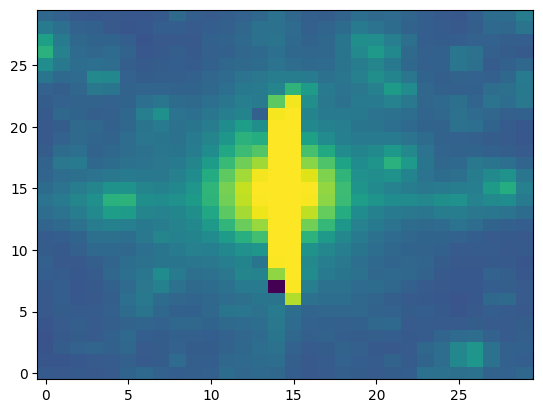

In [763]:
from astropy.io import fits
import matplotlib.pyplot as plt

file = fits.open("./tess-s0013-2-1_284.237621_-67.233495_30x30_astrocut.fits")
hdu = file[1]

# Header Info
# print(hdu.header)

fluxes = hdu.data['FLUX']

# scaled for a better understanding of the sky beyond the central star
plt.imshow(asinh(fluxes[0,:,:]), origin='lower', aspect='auto')

# Answer

Due to the source being too bright and distant, not capable to capture it in detail, 

the telescope's CCD blends the star (average pixel color over some observed region)."

We can also see difraction spikes. Diffraction spikes occur because light waves passing 

through the small gaps / edges of these mirrors (support structures) interact with them 

and create interference patterns.

/var/folders/26/wcqm9b0d0wbff8fjfmmh64fm0000gn/T/ipykernel_15251/3712805318.py:12: DeprecationWarning: `photutils.CircularAperture` is a deprecated alias for `photutils.aperture.CircularAperture` and will be removed in the future. Instead, please use `from photutils.aperture import CircularAperture` to silence this warning.
  from photutils import CircularAperture, aperture_photometry
/var/folders/26/wcqm9b0d0wbff8fjfmmh64fm0000gn/T/ipykernel_15251/3712805318.py:12: DeprecationWarning: `photutils.aperture_photometry` is a deprecated alias for `photutils.aperture.aperture_photometry` and will be removed in the future. Instead, please use `from photutils.aperture import aperture_photometry` to silence this warning.
  from photutils import CircularAperture, aperture_photometry


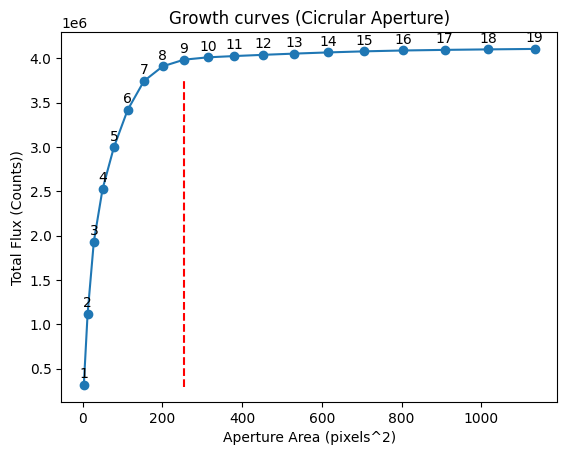

In [764]:
########################################
## Run Command: pip install photutils ##
########################################

###########################################
## Helper Function: Aperture Measuremnts ##
###########################################

import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from photutils import CircularAperture, aperture_photometry

file = fits.open("./tess-s0013-2-1_284.237621_-67.233495_30x30_astrocut.fits")
hdu = file[1]

fluxes = hdu.data['FLUX'][0,:,:]
times = hdu.data['TIME']


#######################################
## from the photutils documentations ##
#######################################

aperture_radii = np.arange(1, 20)
aperture_areas = []
total_fluxes = []

for aperture_radius in aperture_radii:
    center = (15, 15)

    ###################################################
    ## Check how flux changes with Circular Aperture
    ################# Explained After  ################
    ###################################################

    aperture = CircularAperture(center, r=aperture_radius)
    flux_table = aperture_photometry(fluxes, aperture)
    
    total_fluxes.append(flux_table['aperture_sum'].sum())
    aperture_areas.append(np.pi * aperture_radius ** 2) # circle area

#######################################
#######################################


plt.plot(aperture_areas, total_fluxes, marker='o', linestyle='-')
plt.xlabel('Aperture Area (pixels^2)')
plt.ylabel('Total Flux (Counts))')
plt.title('Growth curves (Cicrular Aperture)')

# display index
for i, radius in enumerate(aperture_radii):
    plt.annotate(f'{radius}',\
                (aperture_areas[i], total_fluxes[i]),\
                textcoords='offset points',\
                xytext=(0, 5), ha='center')
    
plt.axvline(x=255, ls='--', c='r', ymin=0.04, ymax=0.87)

plt.show()


# Notes

In this experiment, we observed that for Circular Aperture the radii need to be sufficiently 

large to encompass both the diffraction spike originating from the center 

of the star and, in general, any non-circular features in the source object. 

However, this approach might -also- take the flux from other starts on the minor axis,

with the light from other stars, which consequently yields unreliable data. <br><br>


To fix this, the optimal approach would be to employ an Elliptical Aperture. <br><br>

The sense of previous experiemnt was to calculate the major axis of ellipse (equal 

to Circular radii 9 [picture above]) to then find the best minor radii as a single dependency:

/var/folders/26/wcqm9b0d0wbff8fjfmmh64fm0000gn/T/ipykernel_15251/666056885.py:8: DeprecationWarning: `photutils.EllipticalAperture` is a deprecated alias for `photutils.aperture.EllipticalAperture` and will be removed in the future. Instead, please use `from photutils.aperture import EllipticalAperture` to silence this warning.
  from photutils import EllipticalAperture, aperture_photometry
/var/folders/26/wcqm9b0d0wbff8fjfmmh64fm0000gn/T/ipykernel_15251/666056885.py:8: DeprecationWarning: `photutils.aperture_photometry` is a deprecated alias for `photutils.aperture.aperture_photometry` and will be removed in the future. Instead, please use `from photutils.aperture import aperture_photometry` to silence this warning.
  from photutils import EllipticalAperture, aperture_photometry


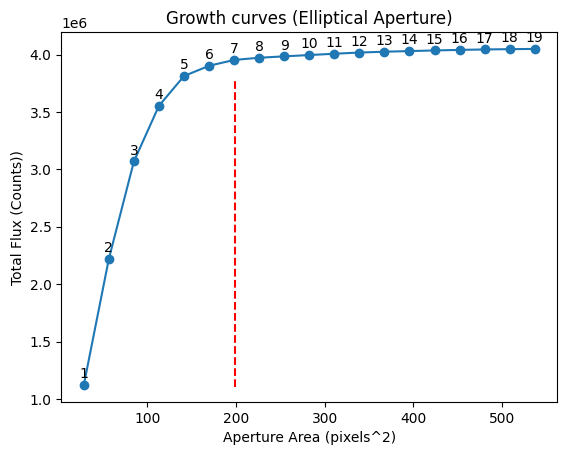

In [765]:
#############################################
## Helper Function: Aperture Measuremnts 2 ##
#############################################

import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from photutils import EllipticalAperture, aperture_photometry

file = fits.open("./tess-s0013-2-1_284.237621_-67.233495_30x30_astrocut.fits")
hdu = file[1]

fluxes = hdu.data['FLUX'][0,:,:]
times = hdu.data['TIME']

a = 9 # look experiment above (semi-major axis)
b = np.arange(1, 20) # dependency (semi-minor axis)
theta = 90       # Rotation (Vertical Position)

aperture_areas2 = []
total_fluxes2 = []

for bcheck in b:
    center = (15, 15)

    ###################################################
    ## Check how flux changes with Circular Aperture ##
    ################# Explained After  ################
    ###################################################

    elliptical_aperture = EllipticalAperture(center, a, bcheck, theta)
    flux_table = aperture_photometry(fluxes, elliptical_aperture)
    
    total_fluxes2.append(flux_table['aperture_sum'].sum())
    aperture_areas2.append(np.pi * a * bcheck) # ellipse area

#######################################
#######################################


plt.plot(aperture_areas2, total_fluxes2, marker='o', linestyle='-')
plt.xlabel('Aperture Area (pixels^2)')
plt.ylabel('Total Flux (Counts))')
plt.title('Growth curves (Elliptical Aperture)')

# display index
for i, radius in enumerate(b):
    plt.annotate(f'{radius}',\
                (aperture_areas2[i], total_fluxes2[i]),\
                textcoords='offset points',\
                xytext=(0, 5), ha='center')
    
plt.axvline(x=199, ls='--', c='r', ymin=0.04, ymax=0.87)

plt.show()

# Notes

Thus the minor-axis of the ellipse should be arount 6 and 7 pixels.

# Problem 5

Based on the analysis of the flux growth curves, an appropriate aperture size for collecting the star's 

light for photometry is a circular aperture with a radius of approximately 9 pixels. To characterize and 

subtract the background light in the data stack, it is good to use an annular aperture with an inner radius 

larger than 9 pixels in approximately 3 times (from the lecture slides) to ensure that only the background is 

measured without contamination from the star's light.

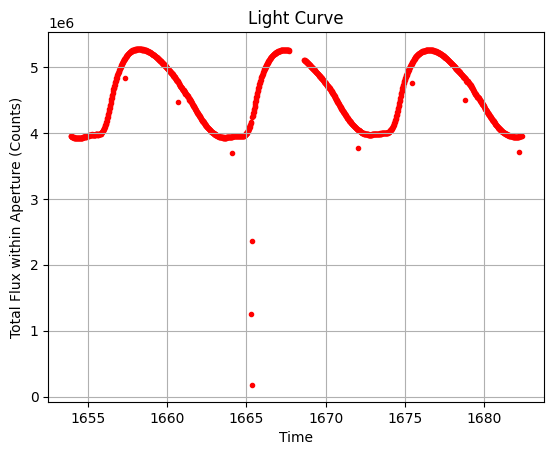

In [766]:
fluxes = hdu.data['FLUX']
times = hdu.data['TIME']

total = []

min_radii = 7 # from the experiment above
maj_radii = 9 # from the experiment above
theta = 90    # Rotation (Vertical Position)
center = (15, 15)

#######################################
#######################################

# photutils library
aperture = EllipticalAperture(center, maj_radii, min_radii, theta)

for frame in fluxes:
    # photutils library
    flux_table = aperture_photometry(frame, aperture)
    total.append(flux_table['aperture_sum'][0])

#######################################
#######################################

plt.scatter(times, total, marker=".", c="r")
plt.xlabel('Time')
plt.ylabel('Total Flux within Aperture (Counts)')
plt.title('Light Curve')
plt.grid(True)
plt.show()

# Answer

The light curve exhibits periodic variations resembling a sinusoidal pattern, 

suggesting the observed star is a variable star. There also exist data gaps, potentially 

due to instrument downtime or even data quality issues. Notably, some outliers deviate 

from the expected pattern, warranting further investigation.

<br>

TESS detectors effectively capture and preserve the intrinsic periodic brightness 

variations of bright stars, allowing astronomers to study and analyze these variations 

to understand the star's properties, such as its oscillations, rotation, or other phenomena.

It also shares which pixels are potentially danaged, so it allows immediately get rid of outliers.


# Problem 6

9.0  -- rotational period estimated (by eye)


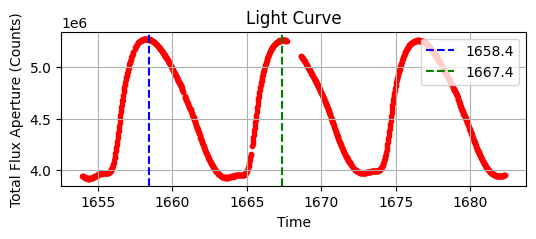

In [767]:
quality = hdu.data['QUALITY'] # Quality

flcleared = hdu.data['FLUX'][quality == 0]
tcleared = hdu.data['TIME'][quality == 0]

total_cleared = []

min_radii = 7 # from the experiment above
maj_radii = 9 # from the experiment above
theta = 90    # Rotation (Vertical Position)
center = (15, 15)

#######################################
#######################################

# photutils library
aperture = EllipticalAperture(center, maj_radii, min_radii, theta)

for frame in flcleared:
    # photutils library
    flux_table = aperture_photometry(frame, aperture)
    total_cleared.append(flux_table['aperture_sum'][0])

#######################################
#######################################

plt.figure(figsize=(6, 2))
plt.scatter(tcleared, total_cleared, marker=".", c="r")

plt.title('Light Curve')
plt.xlabel('Time')
plt.ylabel('Total Flux Aperture (Counts)')

plt.axvline(x=1658.4, ls='--', c='b', label="1658.4")
plt.axvline(x=1667.4, ls='--', c='g', label="1667.4")
plt.legend(loc='upper right')

print((1667.4 - 1658.4), " -- rotational period estimated (by eye)")

plt.grid(True)
plt.show()

# Outliers

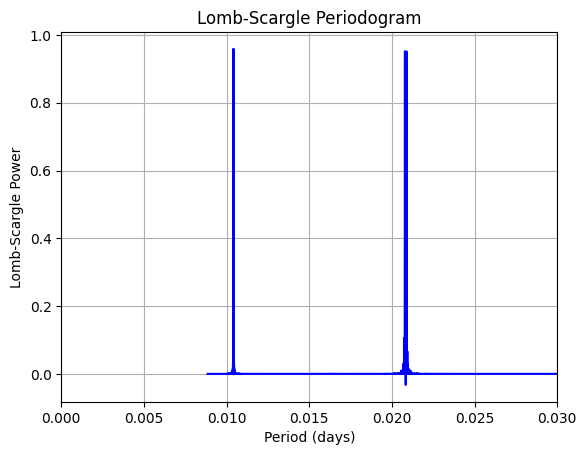

In [768]:
from astropy.timeseries import LombScargle
import matplotlib.pyplot as plt

frequency, power = LombScargle(tcleared, total_cleared).autopower()

# Plot the Lomb-Scargle periodogram with scatter points
plt.plot(1 / frequency, power, linestyle="-", color='blue')

#################
plt.xlim(0, 0.03)
#################

plt.xlabel('Period (days)')
plt.ylabel('Lomb-Scargle Power')
plt.title('Lomb-Scargle Periodogram')
plt.grid(True)

plt.show()

# Notes

We recognize that these values are outliers 

because a rotational period cannot be so small. <br> <br>

Because they deviate the final results, let's

ignore these values for now in the following problem:

# Problem 7

9.15984565471424  -- the best rotational period (by Poisson)


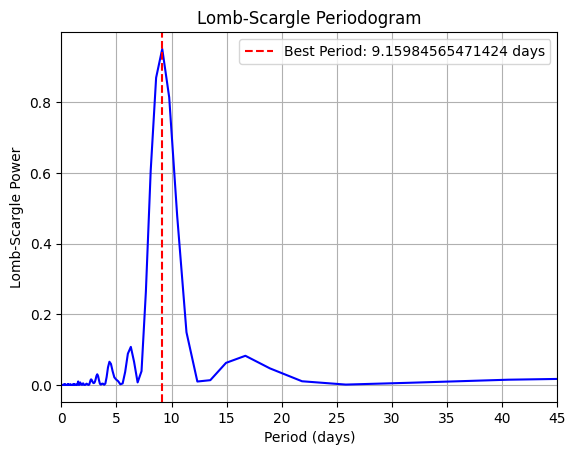

In [769]:
######################################
## Run Command: pip install astropy ##
######################################

from astropy.timeseries import LombScargle
import matplotlib.pyplot as plt

frequency, power = LombScargle(tcleared, total_cleared).autopower()

#####################
## delete outliers ##
#####################

frequency = frequency[:-10000]
power = power[:-10000]

# Plot the Lomb-Scargle periodogram
plt.plot(1 / frequency, power, linestyle="-", color='blue')

###############
plt.xlim(0, 45)
###############

plt.xlabel('Period (days)')
plt.ylabel('Lomb-Scargle Power')
plt.title('Lomb-Scargle Periodogram')
plt.grid(True)

periods = 1 / frequency
best_period = periods[np.argmax(power)]
print(best_period, " -- the best rotational period (by Poisson)")

plt.axvline(x=best_period, color='red', linestyle='--', label=f'Best Period: {best_period} days')
plt.legend()

plt.show()


# Answer

The rotational period estimated by eye in problem 6 is 9 days.

The best rotational period from the current experiment is 9.15984565471424 days. <br> <br>

Yes, the results are approximately the same.

<br>

# Problem 8

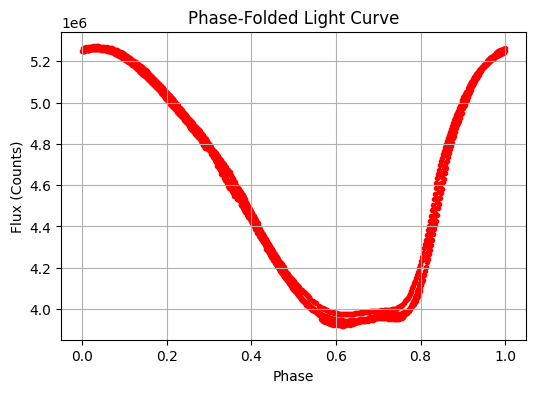

In [770]:
# Get Each Period (Array)
# Should be size of around 3 (from the Light Curve above)
phase = (tcleared / best_period)
# (Initialy from 0 to n, amount of the periods)
# Want to represent within 1 period (From 0 to 1 Phase)
range = phase % 1

# Plot the phase-folded light curve
plt.figure(figsize=(6, 4))
plt.scatter(range, total_cleared, marker=".", c="r")

plt.xlabel('Phase')
plt.ylabel('Flux (Counts)')
plt.title('Phase-Folded Light Curve')
plt.grid(True)

plt.show()